In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


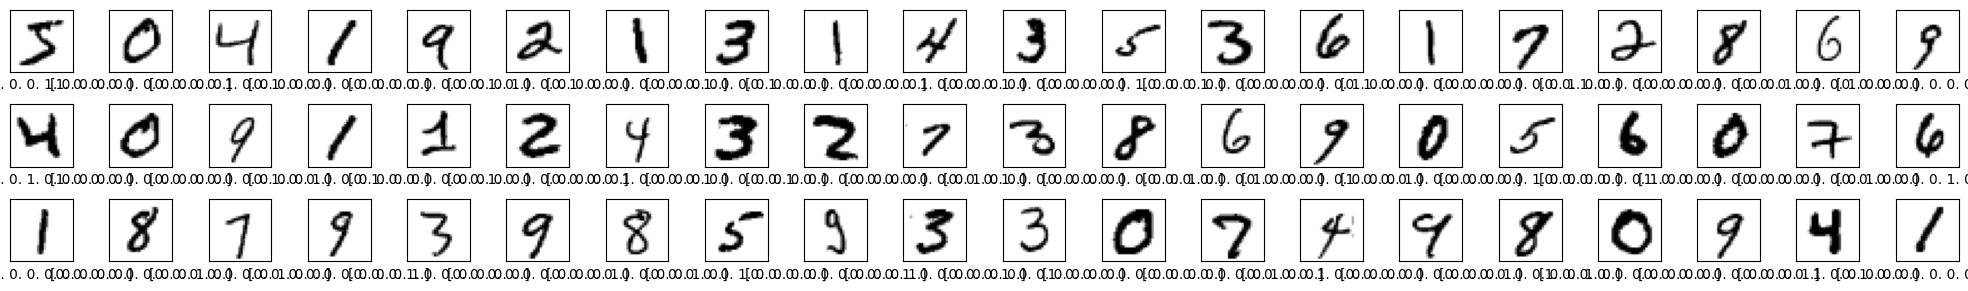

In [3]:
rows = 3
cols = 20
i = 0
plt.figure(figsize=(20,3))
for r in range(rows):
    for c in range(cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
def buildModel():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model
model = buildModel()

In [5]:
model_sgd = buildModel()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
model_adam = buildModel()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
model_rmsprop = buildModel()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [6]:
history_sgd = model_sgd.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 24s 31ms/step - loss: 0.9365 - accuracy: 0.7417 - val_loss: 0.2756 - val_accuracy: 0.9196
Epoch 2/7
750/750 [==============================] - 22s 29ms/step - loss: 0.2541 - accuracy: 0.9240 - val_loss: 0.1884 - val_accuracy: 0.9491
Epoch 3/7
750/750 [==============================] - 23s 31ms/step - loss: 0.1771 - accuracy: 0.9480 - val_loss: 0.1479 - val_accuracy: 0.9571
Epoch 4/7
750/750 [==============================] - 23s 31ms/step - loss: 0.1368 - accuracy: 0.9593 - val_loss: 0.1232 - val_accuracy: 0.9652
Epoch 5/7
750/750 [==============================] - 23s 30ms/step - loss: 0.1141 - accuracy: 0.9654 - val_loss: 0.1075 - val_accuracy: 0.9698
Epoch 6/7
750/750 [==============================] - 22s 30ms/step - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.0978 - val_accuracy: 0.9721
Epoch 7/7
750/750 [==============================] - 23s 30ms/step - loss: 0.0869 - accuracy: 0.9738 - val_loss: 0.0921 - val_accuracy: 0.9739

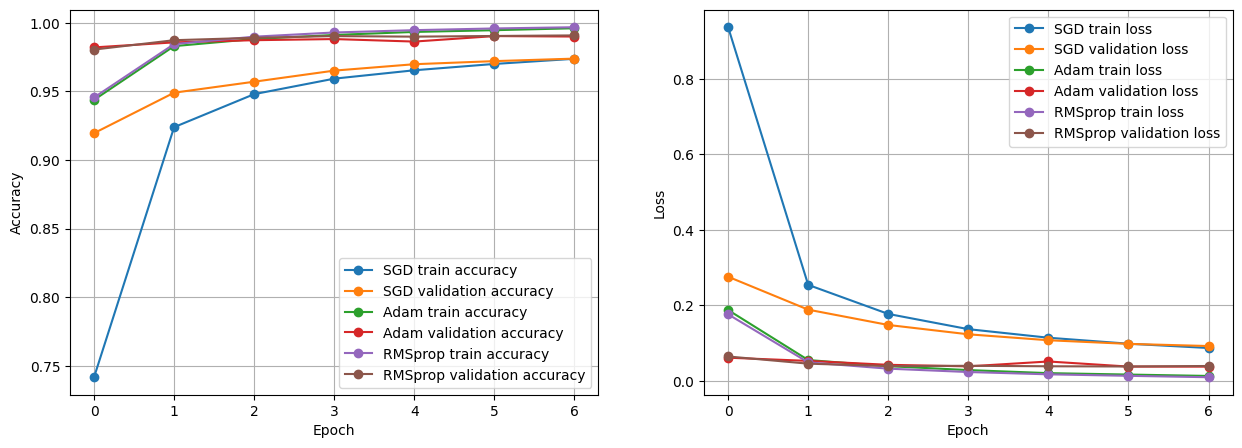

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()